In [1]:
from numpy import random
import pandas as pd
import numpy as np

In [2]:
import seaborn.objects as so
import warnings
warnings.filterwarnings('ignore')

In [3]:
inflow = random.choice([50, 60, 70], p = [0.3, 0.4, 0.3], size = 10000)
inflow[0:10]

array([50, 60, 70, 60, 60, 60, 50, 70, 50, 50])

In [4]:
inflowpd = pd.DataFrame({'inflow' : inflow})
inflowpd

,inflow
0,50
1,60
2,70
3,60
4,60
...,...
9995,70
9996,60
9997,50
9998,60


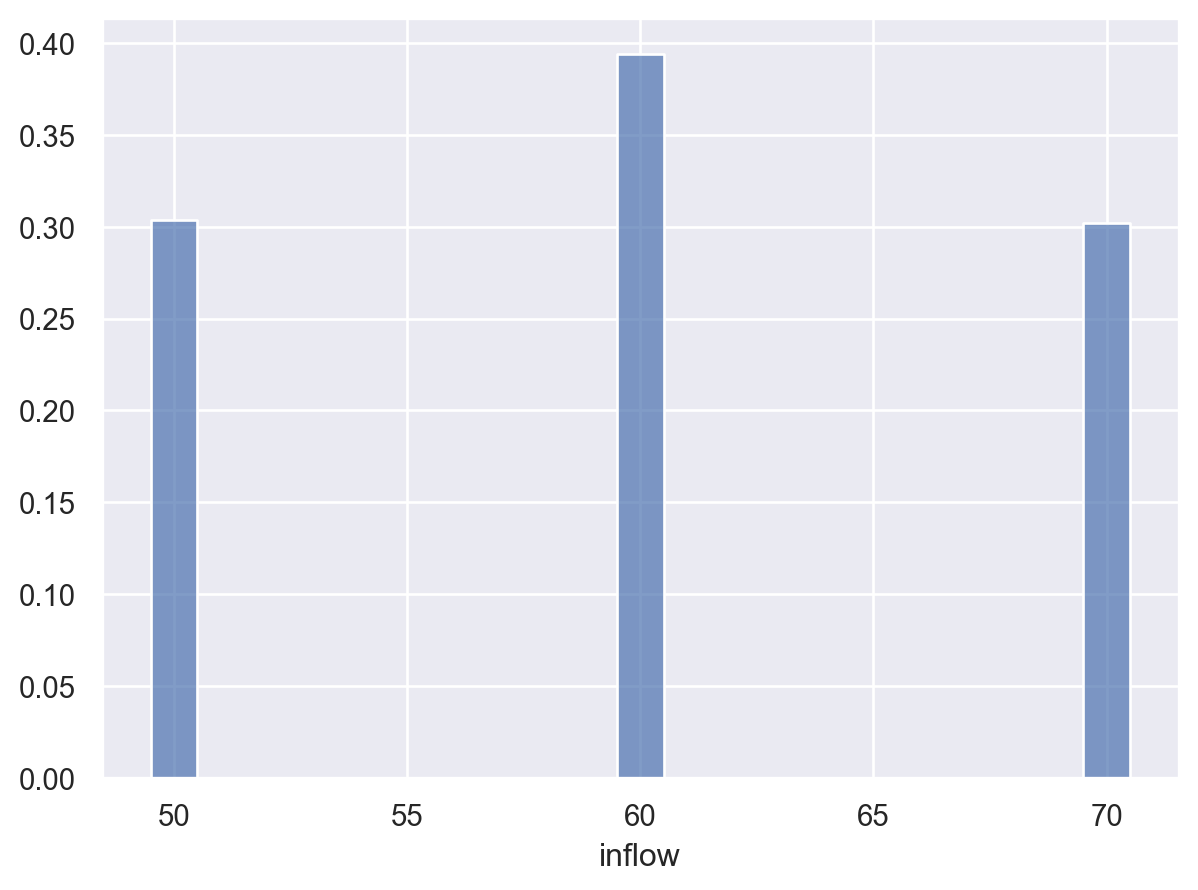

In [5]:
(
 so.Plot(inflowpd, x='inflow')
 .add(so.Bars(), so.Hist(stat="proportion", discrete=True))
 )


In [6]:
outflow = random.choice([50, 70], p = [ 0.45, 0.55], size = 10000)
outflow[0:10]

array([50, 50, 50, 70, 70, 70, 70, 50, 50, 70])

In [7]:
cashflow = pd.DataFrame({'inflow' : inflow, 'outflow' : outflow})
cashflow.head()

,inflow,outflow
0,50,50
1,60,50
2,70,50
3,60,70
4,60,70


In [8]:
cashflow['net cash-flow']=cashflow['inflow']-cashflow['outflow']
cashflow.head()

,inflow,outflow,net cash-flow
0,50,50,0
1,60,50,10
2,70,50,20
3,60,70,-10
4,60,70,-10


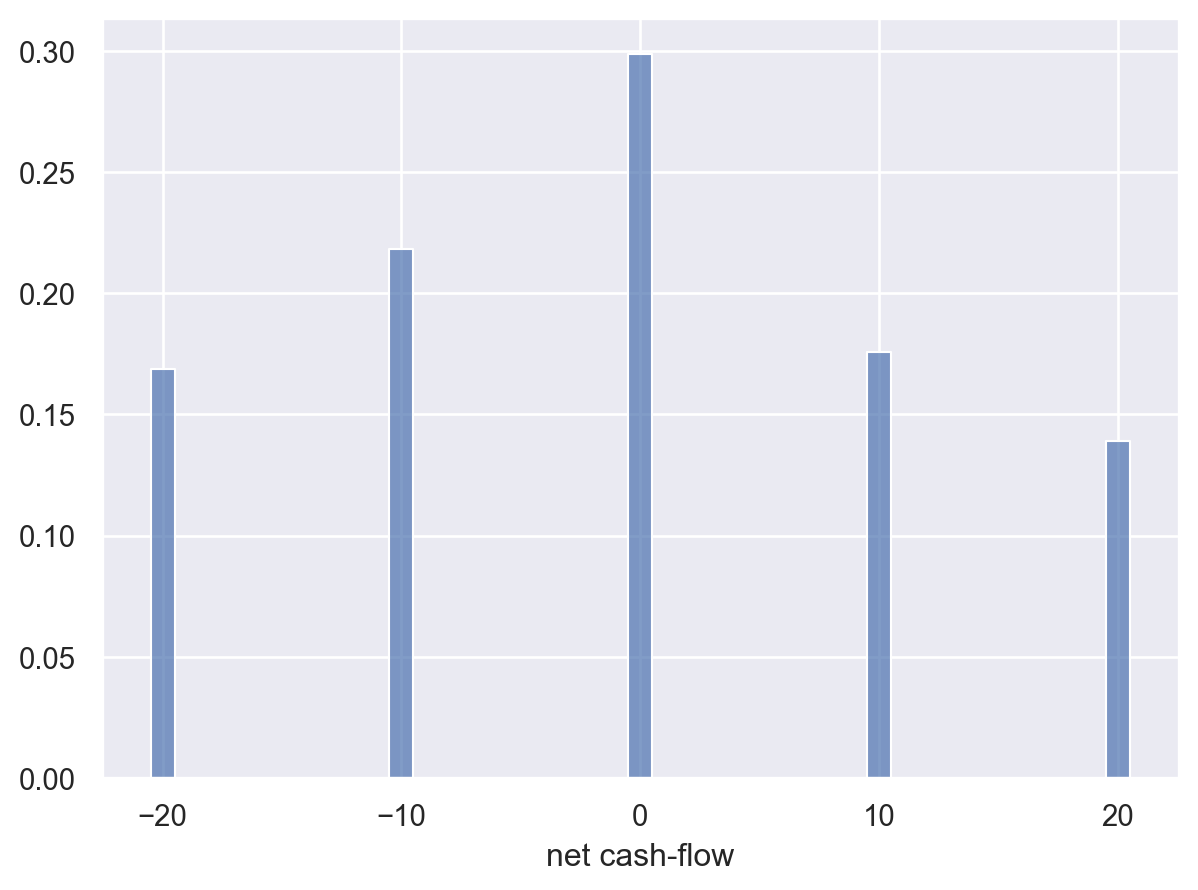

In [9]:
(
 so.Plot(cashflow, x='net cash-flow')
 .add(so.Bars(), so.Hist(stat="proportion", discrete=True))
 )

In [10]:
cashflow['net cash-flow'].value_counts()/len(cashflow)

net cash-flow
 0     0.2986
-10    0.2181
 10    0.1757
-20    0.1686
 20    0.1390
Name: count, dtype: float64

In [11]:
len(cashflow)

10000

# In-class exercise

In [14]:
variable_costs = random.choice([9, 11, 13, 15, 17], p = [0.1, 0.2, 0.3, 0.2, 0.2], size = 10000)

In [15]:
sales = random.choice([12500, 17500, 22500, 27500], p = [0.1, 0.3, 0.4, 0.2], size = 10000)

In [16]:
fixed_costs = random.choice([125, 175, 225, 275], p = [0.2, 0.5, 0.2, 0.1], size = 10000)

In [18]:
siu = pd.DataFrame({'variable_costs' : variable_costs, 'sales' : sales, 'fixed_costs':fixed_costs})
siu

,variable_costs,sales,fixed_costs
0,17,22500,125
1,13,17500,175
2,13,22500,125
3,17,17500,175
4,13,27500,225
...,...,...,...
9995,13,17500,175
9996,13,17500,275
9997,11,27500,125
9998,15,17500,275


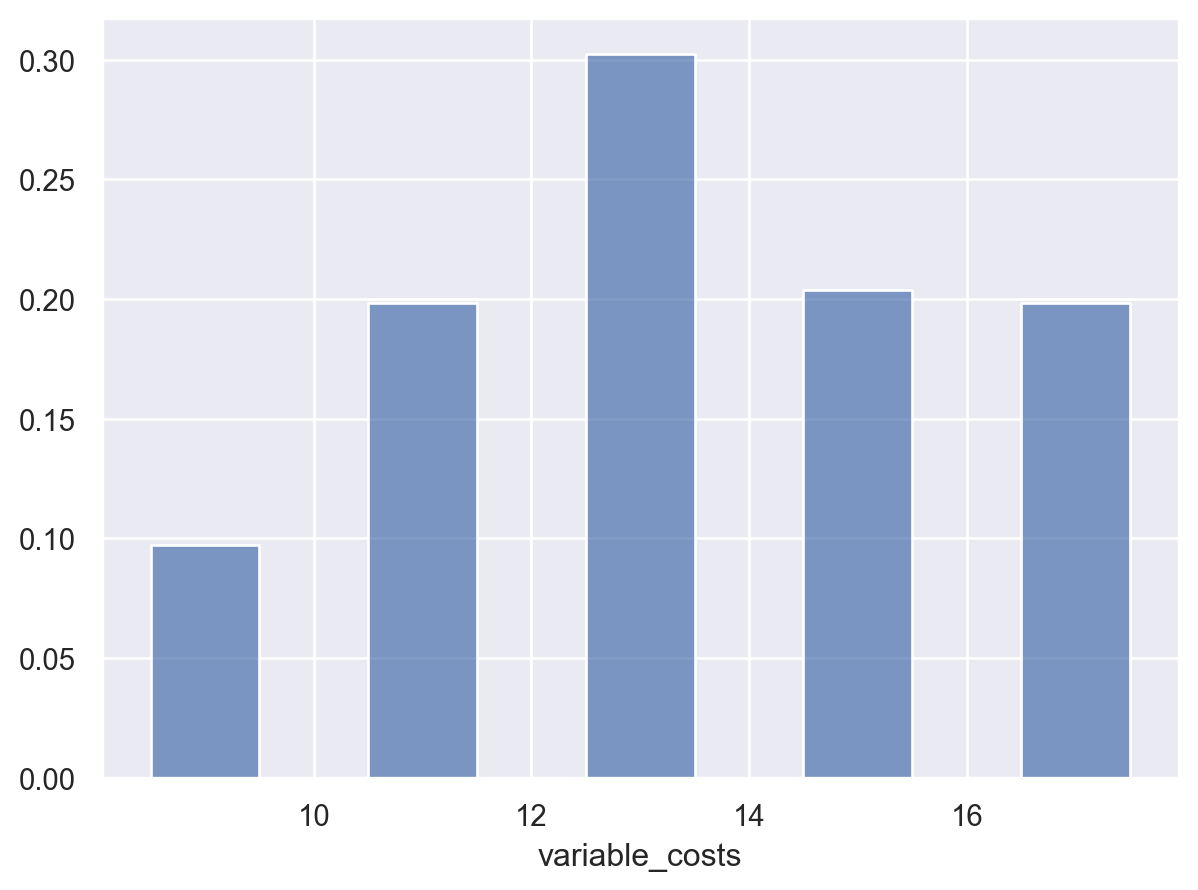

In [20]:
(
 so.Plot(siu, x='variable_costs')
 .add(so.Bars(), so.Hist(stat="proportion", discrete=True))
 )

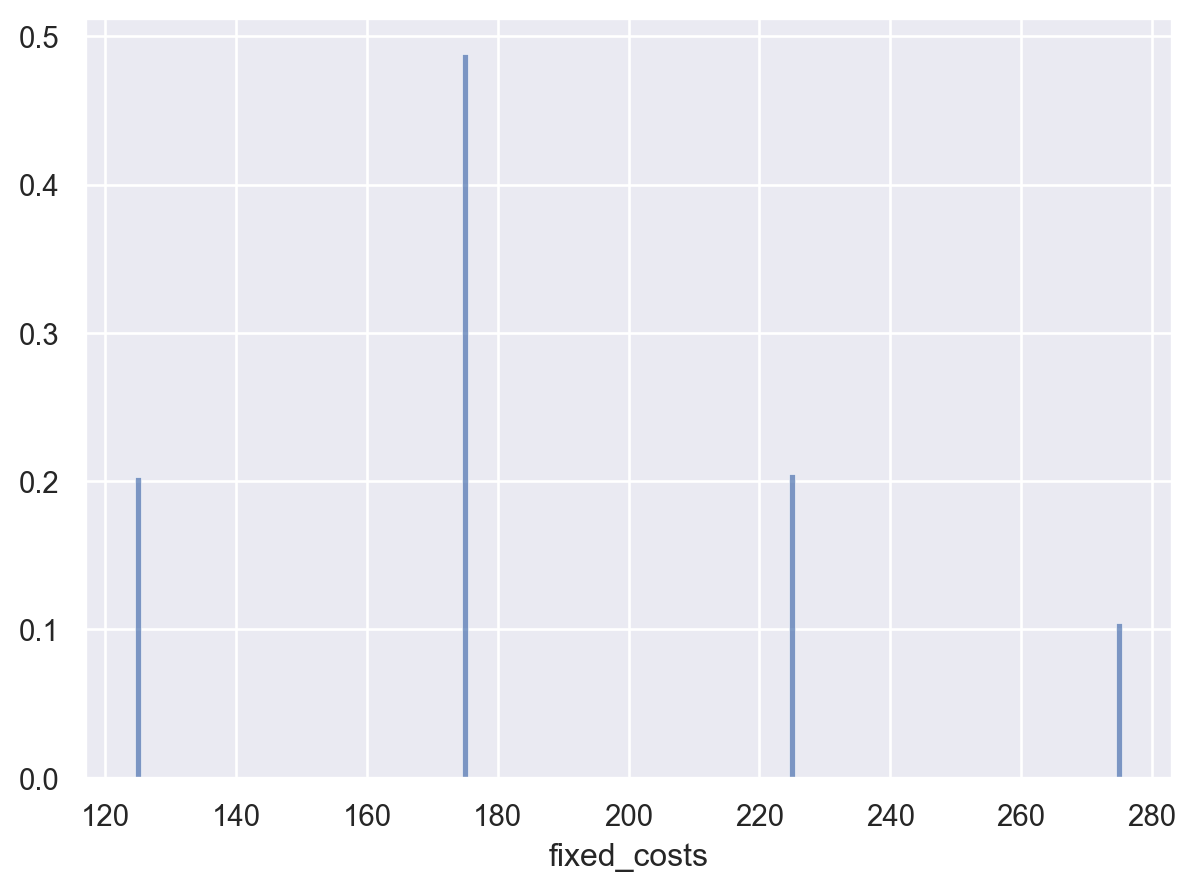

In [25]:
(
 so.Plot(siu, x='fixed_costs')
 .add(so.Bars(), so.Hist(stat="proportion", discrete=True))
 )

In [27]:
siu['sales'].value_counts()/len(siu)

sales
22500    0.3998
17500    0.2992
27500    0.2002
12500    0.1008
Name: count, dtype: float64

In [28]:
siu['Revenue'] = sales *25
siu['Var_exp'] = sales * variable_costs

In [30]:
siu

,variable_costs,sales,fixed_costs,Revenue,Var_exp
0,17,22500,125,562500,382500
1,13,17500,175,437500,227500
2,13,22500,125,562500,292500
3,17,17500,175,437500,297500
4,13,27500,225,687500,357500
...,...,...,...,...,...
9995,13,17500,175,437500,227500
9996,13,17500,275,437500,227500
9997,11,27500,125,687500,302500
9998,15,17500,275,437500,262500


In [33]:
siu['Profit'] = siu['Revenue'] - siu['Var_exp'] - siu['fixed_costs']

In [34]:
siu

,variable_costs,sales,fixed_costs,Revenue,Var_exp,Profit
0,17,22500,125,562500,382500,179875
1,13,17500,175,437500,227500,209825
2,13,22500,125,562500,292500,269875
3,17,17500,175,437500,297500,139825
4,13,27500,225,687500,357500,329775
...,...,...,...,...,...,...
9995,13,17500,175,437500,227500,209825
9996,13,17500,275,437500,227500,209725
9997,11,27500,125,687500,302500,384875
9998,15,17500,275,437500,262500,174725


In [35]:
siu.describe()

,variable_costs,sales,fixed_costs,Revenue,Var_exp,Profit
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13.414400,20997.000000,185.560000,524925.000000,281500.000000,243239.440000
std,2.483403,4506.442256,44.194816,112661.056388,80091.987568,74977.817261
min,9.000000,12500.000000,125.000000,312500.000000,112500.000000,99725.000000
25%,11.000000,17500.000000,175.000000,437500.000000,227500.000000,179825.000000
50%,13.000000,22500.000000,175.000000,562500.000000,292500.000000,224875.000000
75%,15.000000,22500.000000,225.000000,562500.000000,337500.000000,279825.000000
max,17.000000,27500.000000,275.000000,687500.000000,467500.000000,439875.000000


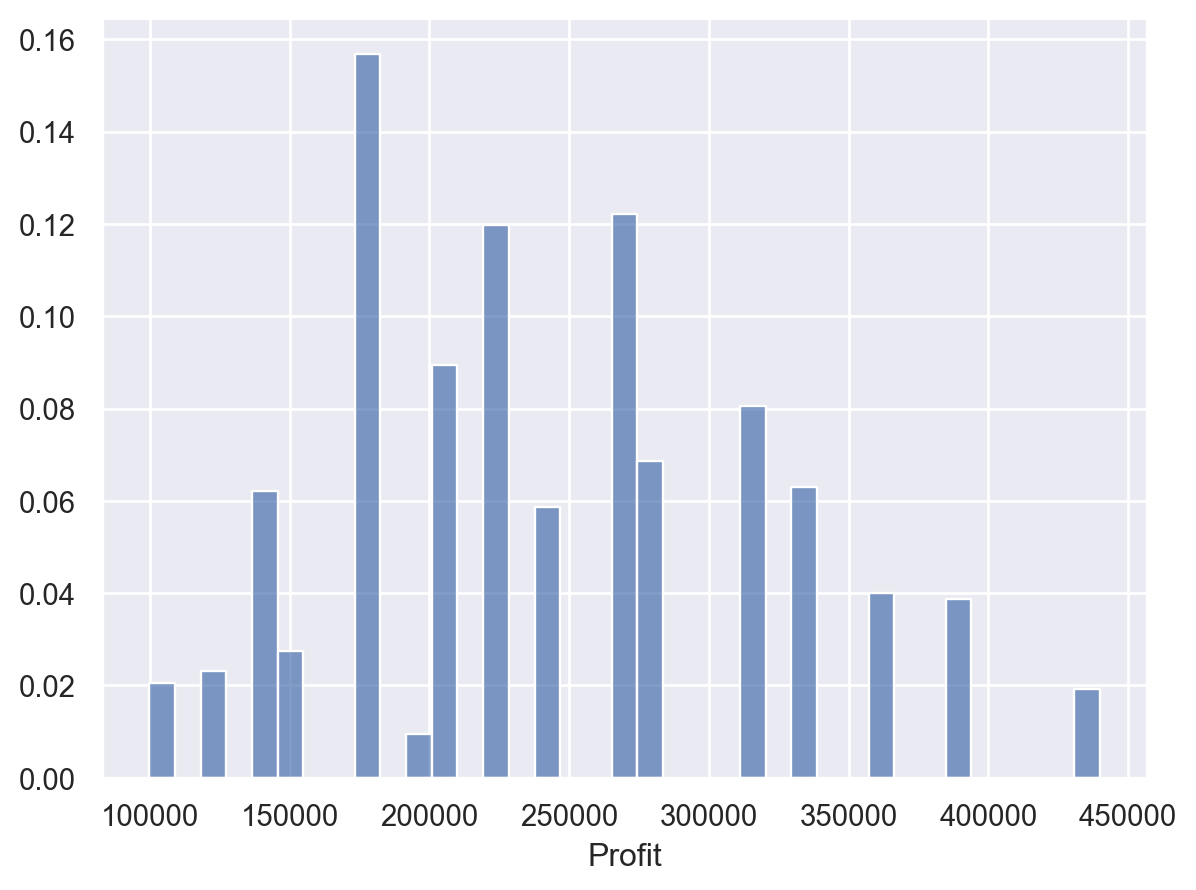

In [37]:
(
 so.Plot(siu, x='Profit')
 .add(so.Bars(), so.Hist(stat="proportion"))
 )